In [1]:
# Just in case a reload is required
from importlib import reload

import dill
import matplotlib.pyplot as plt

import energy
import store

In [2]:
job_data: store.JobData = store.load_job_data("c59791")

In [3]:
fci_energies = []
qsci_energies = []
for molecule, result in zip(job_data.molecules, job_data.results):
    fci, qsci = energy.calculate_energy_ladders(molecule, result)
    fci_energies.append(fci)
    qsci_energies.append(qsci)


Percentage of measurements in the correct particle sector:  19.537 %

Percentage of measurements in the correct particle sector:  21.960 %

Percentage of measurements in the correct particle sector:  17.230 %

Percentage of measurements in the correct particle sector:  18.079 %

Percentage of measurements in the correct particle sector:  11.646 %

Percentage of measurements in the correct particle sector:  10.822 %

Percentage of measurements in the correct particle sector:  13.428 %

Percentage of measurements in the correct particle sector:  20.221 %

Percentage of measurements in the correct particle sector:  13.434 %

Percentage of measurements in the correct particle sector:  22.113 %

Percentage of measurements in the correct particle sector:  12.793 %

Percentage of measurements in the correct particle sector:  17.303 %

Percentage of measurements in the correct particle sector:  13.489 %

Percentage of measurements in the correct particle sector:  12.903 %

Percentage of measu

In [3]:
data_path = store.job_data_path(job_data.job_id)

In [4]:
molecule = job_data.molecules[0]

In [5]:
import numpy as np
qsci_stretch = np.array(list(zip(*qsci_energies)))
fci_stretch = np.array(list(zip(*fci_energies)))
qsci_error = qsci_stretch - fci_stretch

In [6]:
with open(data_path / "qsci_error.pkl", 'wb') as file:
    dill.dump(qsci_error, file)
with open(data_path / "qsci_energies.pkl", 'wb') as file:
    dill.dump(qsci_stretch, file)
with open(data_path / "fci_energies.pkl", 'wb') as file:
    dill.dump(fci_stretch, file)

In [10]:
data_path / "qsci_error.pkl"

PosixPath('/home/fredd/code/qsci/data/c59791/qsci_error.pkl')

In [11]:
with open(data_path / "qsci_error.pkl", 'rb') as file:
    qsci_error = dill.load(file)
# with open(data_path / "qsci_energies.pkl", 'rb') as file:
#     qsci_energies = dill.load(file)
# with open(data_path / "fci_energies.pkl", 'rb') as file:
#     fci_energies = dill.load(file)

EOFError: Ran out of input

In [9]:
import dill
with open(data_path / "qsci_error.pkl", 'rb') as file:
    qsci_error = dill.load(file)

In [7]:
bond_lengths = []
for mol in job_data.molecules:
    bond_lengths.append((round(mol.geometry[1][1][2], 1)))

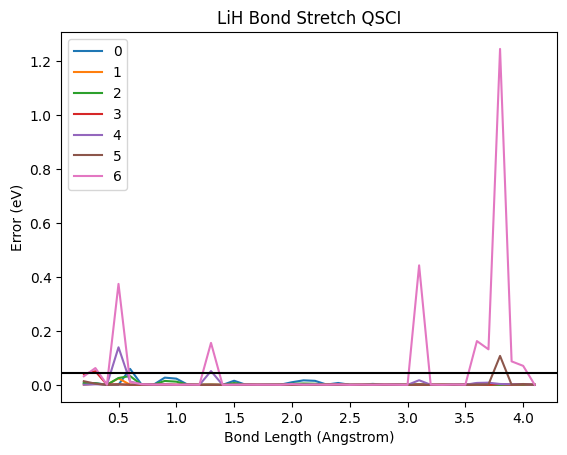

In [8]:
fig1 = plt.figure()
for i, state in enumerate(qsci_error):
    plt.plot(bond_lengths, state, label=str(i))
plt.axhline(0.043, color='black')
plt.legend()
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

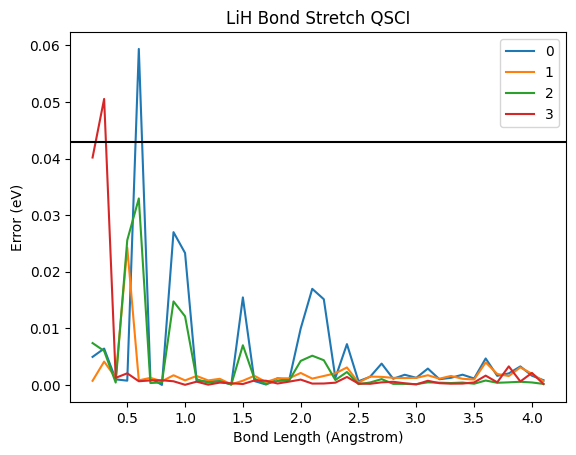

In [9]:
fig2 = plt.figure()
for i, state in enumerate(qsci_error[:-3]):
    plt.plot(bond_lengths, state, label=str(i))
plt.axhline(0.043, color='black')
plt.legend()
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Error (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

In [10]:
qsci_stretch = np.array(list(zip(*qsci_energies)))
fci_stretch = np.array(list(zip(*fci_energies)))
qsci_pes = qsci_stretch - np.min(qsci_stretch)
fci_pes = fci_stretch - np.min(fci_stretch)

In [11]:
np.min(qsci_stretch)

-214.488397145062

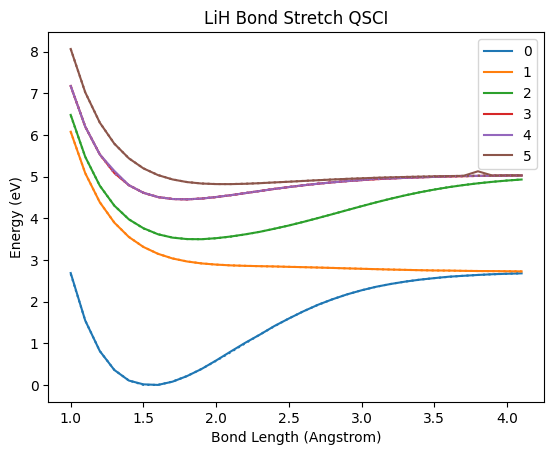

In [15]:
fig3 = plt.figure()
# for i, state in enumerate(qsci_pes[0]):
#     plt.plot(bond_lengths, state, label=str(i))

for i, state in enumerate(qsci_stretch[:6]):
    plt.plot(bond_lengths[8:], qsci_pes[i][8:], label=str(i))
plt.legend()

# Reset colour cycle so FCI and QSCI colours correspond
plt.gca().set_prop_cycle(None)
for i, state in enumerate(fci_pes[:6]):
    plt.plot(bond_lengths[8:], state[8:], ':', label=str(i))

plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()

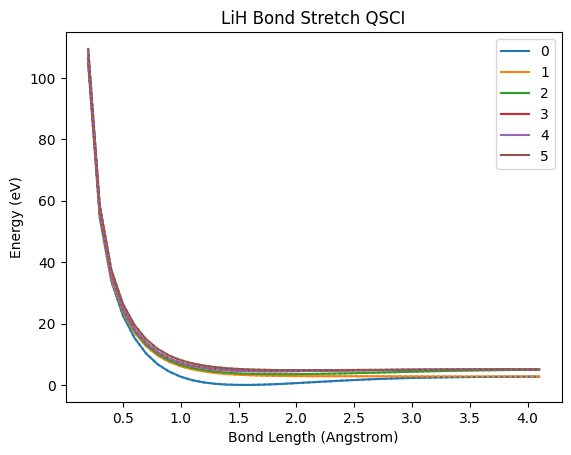

In [13]:
fig3 = plt.figure()
# for i, state in enumerate(qsci_pes[0]):
#     plt.plot(bond_lengths, state, label=str(i))

for i, state in enumerate(qsci_stretch[:6]):
    plt.plot(bond_lengths, qsci_pes[i], label=str(i))
plt.legend()

# Reset colour cycle so FCI and QSCI colours correspond
plt.gca().set_prop_cycle(None)
for i, state in enumerate(fci_pes[:6]):
    plt.plot(bond_lengths, state, ':', label=str(i))

plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('LiH Bond Stretch QSCI')
plt.show()